In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
# Read the csv file into a pandas DataFrame
songs_csv = "../../Resources/merged_songs_data.csv"
songs_df = pd.read_csv(songs_csv, index_col=0)
# songs_df.columns
songs_df = songs_df.dropna()
songs_df = songs_df.sort_values(by=['popularity'])
songs_df.head()

G:\Programs\Anaconda\envs\PythonAdv\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
1316,7u1LLhNqecfHzu6O0SD8Vw,0.285,0.966,11,1.369,1,0.0632,0.65100,0.879000,0.1710,0.4660,86.453,124560,4.0,0.0
1210,1OR29CDoZkgNgYbPHMuBTD,0.422,0.947,10,-6.879,1,0.5080,0.17000,0.000000,0.7750,0.2360,117.340,40120,4.0,0.0
1211,0prv1JqFF75iNvjr9ihOho,0.294,0.837,0,-5.306,1,0.0482,0.00219,0.000000,0.8820,0.6400,134.755,180573,4.0,0.0
1212,3ejBDmup7fFu3mMrJLpNNL,0.149,0.340,11,-8.613,0,0.0757,0.38000,0.000146,0.8910,0.0833,212.155,127853,3.0,0.0
1250,17RotlN2CUYC1W2jxT8FAJ,0.520,0.930,2,-6.327,1,0.2260,0.08980,0.000000,0.0837,0.3750,116.591,227253,4.0,0.0


In [13]:
X = songs_df["danceability"].values.reshape(-1, 1)
y = songs_df["popularity"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (2633, 1) (2633, 1)


In [14]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [15]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [16]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.04740410962911468
Testing Score: 0.04922667270656467


Text(0.5, 1.0, 'Residual Plot')

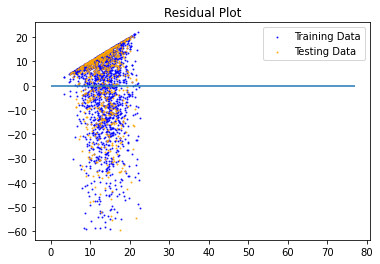

In [23]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data", s=1, alpha=0.8)
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data", s=1, alpha=0.8)
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION